In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pow,exp
from sklearn.linear_model import LinearRegression
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error

In [80]:
df_train= pd.read_csv('pisa2009train.csv')
df_test = pd.read_csv('pisa2009test.csv')

**Problem 1.1 - Dataset size**
1 point possible (graded)
Load the training and testing sets using the read.csv() function, and save them as variables with the names pisaTrain and pisaTest.

How many students are there in the training set?



In [81]:
print df_train.shape
print df_test.shape

(3663, 24)
(1570, 24)


# Plot correlations

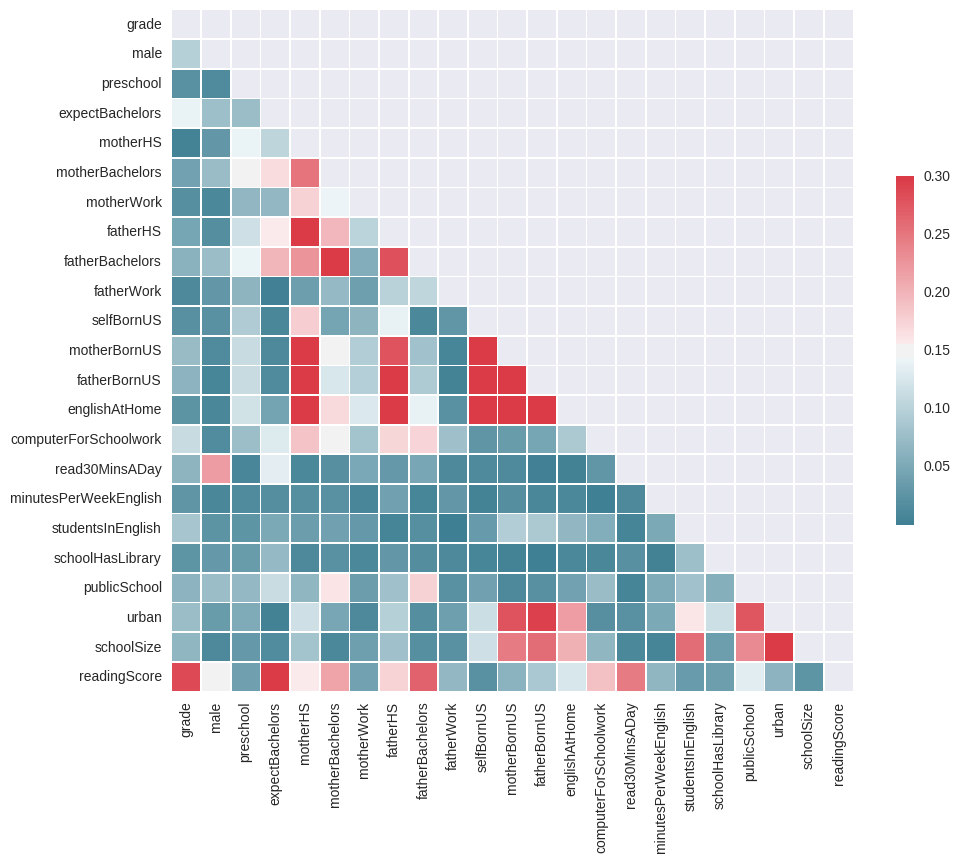

In [82]:
# source: http://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = np.abs(df_train.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**Problem 1.2 - Summarizing the dataset**
2 points possible (graded)

Using tapply() on pisaTrain, what is the average reading test score of males?

Of females?



In [83]:
df_train[df_train.male==1].readingScore.mean()

483.53247863247805

In [84]:
df_train[df_train.male==0].readingScore.mean()

512.94063093244

**Problem 1.3 - Locating missing values**

1 point possible (graded)
Which variables are missing data in at least one observation in the training set? Select all that apply.




In [85]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>0:
        print col,df_train[col].isnull().sum()

raceeth 35
preschool 56
expectBachelors 62
motherHS 97
motherBachelors 397
motherWork 93
fatherHS 245
fatherBachelors 569
fatherWork 233
selfBornUS 69
motherBornUS 71
fatherBornUS 113
englishAtHome 71
computerForSchoolwork 65
read30MinsADay 34
minutesPerWeekEnglish 186
studentsInEnglish 249
schoolHasLibrary 143
schoolSize 162


**Problem 1.4 - Removing missing values**
2 points possible (graded)

Linear regression discards observations with missing data, so we will remove all such observations from the training and testing sets. Later in the course, we will learn about imputation, which deals with missing data by filling in missing values with plausible information.

Type the following commands into your R console to remove observations with any missing value from pisaTrain and pisaTest:

pisaTrain = na.omit(pisaTrain)

pisaTest = na.omit(pisaTest)

How many observations are now in the training set?

In [86]:
df_train =df_train.dropna()
df_test = df_test.dropna()

In [87]:
print df_train.shape
print df_test.shape

(2414, 24)
(990, 24)


**Problem 2.1 - Factor variables**
2 points possible (graded)
Factor variables are variables that take on a discrete set of values, like the "Region" variable in the WHO dataset from the second lecture of Unit 1. This is an unordered factor because there isn't any natural ordering between the levels. An ordered factor has a natural ordering between the levels (an example would be the classifications "large," "medium," and "small").

Which of the following variables is an unordered factor with at least 3 levels? (Select all that apply.)




In [88]:
for col in df_train.columns:
    if df_train[col].value_counts().count()>=3 :
        print col, df_train[col].value_counts().count()


grade 5
raceeth 7
minutesPerWeekEnglish 142
studentsInEnglish 51
schoolSize 148
readingScore 2021


**Problem 2.2 - Unordered factors in regression models**

1 point possible (graded)
To include unordered factors in a linear regression model, we define one level as the "reference level" and add a binary variable for each of the remaining levels. In this way, a factor with n levels is replaced by n-1 binary variables. The reference level is typically selected to be the most frequently occurring level in the dataset.

As an example, consider the unordered factor variable "color", with levels "red", "green", and "blue". If "green" were the reference level, then we would add binary variables "colorred" and "colorblue" to a linear regression problem. All red examples would have colorred=1 and colorblue=0. All blue examples would have colorred=0 and colorblue=1. All green examples would have colorred=0 and colorblue=0.

Now, consider the variable "raceeth" in our problem, which has levels "American Indian/Alaska Native", "Asian", "Black", "Hispanic", "More than one race", "Native Hawaiian/Other Pacific Islander", and "White". Because it is the most common in our population, we will select White as the reference level.

Which binary variables will be included in the regression model? (Select all that apply.)

In [89]:
df_train['raceeth'].value_counts()

White                                     1470
Hispanic                                   500
Black                                      228
Asian                                       95
More than one race                          81
American Indian/Alaska Native               20
Native Hawaiian/Other Pacific Islander      20
Name: raceeth, dtype: int64

**Problem 3.1 - Building a model**
2.0 points possible (graded)
Because the race variable takes on text values, it was loaded as a factor variable when we read in the dataset with read.csv() -- you can see this when you run str(pisaTrain) or str(pisaTest). However, by default R selects the first level alphabetically ("American Indian/Alaska Native") as the reference level of our factor instead of the most common level ("White"). Set the reference level of the factor by typing the following two lines in your R console:

pisaTrain$raceeth = relevel(pisaTrain$raceeth, "White")

pisaTest$raceeth = relevel(pisaTest$raceeth, "White")

Now, build a linear regression model (call it lmScore) using the training set to predict readingScore using all the remaining variables.

It would be time-consuming to type all the variables, but R provides the shorthand notation "readingScore ~ ." to mean "predict readingScore using all the other variables in the data frame." The period is used to replace listing out all of the independent variables. As an example, if your dependent variable is called "Y", your independent variables are called "X1", "X2", and "X3", and your training data set is called "Train", instead of the regular notation:

LinReg = lm(Y ~ X1 + X2 + X3, data = Train)

You would use the following command to build your model:

LinReg = lm(Y ~ ., data = Train)

What is the Multiple R-squared value of lmScore on the training set?

In [90]:
def relevel_race(df):
    dummies = pd.get_dummies(df.raceeth)

    df = pd.concat([df, dummies], axis=1)
    df = df.drop(['raceeth', 'White'], axis=1)
    return df

In [91]:
df_train = relevel_race(df_train)
df_test = relevel_race(df_test)

In [92]:
features = df_train.columns.tolist()#
features.remove(u'readingScore')
print features

['grade', 'male', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS', 'englishAtHome', 'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary', 'publicSchool', 'urban', 'schoolSize', 'American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic', 'More than one race', 'Native Hawaiian/Other Pacific Islander']


In [93]:
clf = LinearRegression()
clf.fit(df_train[features],df_train.readingScore)
clf.score(df_train[features],df_train.readingScore)



0.32514335592135679

**Problem 3.2 - Computing the root-mean squared error of the model**

1 point possible (graded)
What is the training-set root-mean squared error (RMSE) of lmScore?

In [94]:
np.sqrt(mean_squared_error(df_train.readingScore,clf.predict(df_train[features])))

73.365551432984503

**Problem 3.3 - Comparing predictions for similar students**

1 point possible (graded)
Consider two students A and B. They have all variable values the same, except that student A is in grade 11 and student B is in grade 9. What is the predicted reading score of student A minus the predicted reading score of student B?

In [95]:
df_coeff = pd.DataFrame(zip(features,clf.coef_.tolist()),columns=['Feature','coeff'])
df_coeff['abs_coef']=np.abs(df_coeff.coeff)
df_coeff = df_coeff.sort_values(by='abs_coef',ascending=False)
df_coeff = df_coeff.set_index('Feature')
df_coeff.head(10)

,coeff,abs_coef
Feature,,
American Indian/Alaska Native,-67.277327,67.277327
Black,-67.012347,67.012347
expectBachelors,55.267080,55.267080
Hispanic,-38.975486,38.975486
read30MinsADay,34.871924,34.871924
grade,29.542707,29.542707
computerForSchoolwork,22.500232,22.500232
fatherBachelors,16.929755,16.929755
More than one race,-16.922522,16.922522


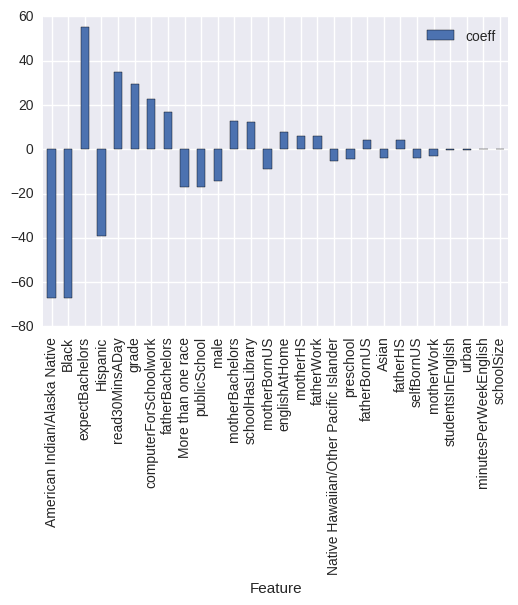

In [96]:
df_coeff[['coeff']].plot(kind='bar')

**Problem 3.4 - Interpreting model coefficients**

1 point possible (graded)
What is the meaning of the coefficient associated with variable raceethAsian?

In [97]:
df_coeff.ix['Asian']

coeff      -4.110325
abs_coef    4.110325
Name: Asian, dtype: float64

**Problem 3.5 - Identifying variables lacking statistical significance**

1 point possible (graded)

Based on the significance codes, which variables are candidates for removal from the model? Select all that apply. (We'll assume that the factor variable raceeth should only be removed if none of its levels are significant.)

**Problem 4.1 - Predicting on unseen data**

2.0 points possible (graded)

Using the "predict" function and supplying the "newdata" argument, use the lmScore model to predict the reading scores of students in pisaTest. Call this vector of predictions "predTest". Do not change the variables in the model (for example, do not remove variables that we found were not significant in the previous part of this problem). Use the summary function to describe the test set predictions.

What is the range between the maximum and minimum predicted reading score on the test set?

In [104]:
df_predict_test = clf.predict(df_test[features])
print df_predict_test.min()-df_predict_test.max()

-284.468311795


**Problem 4.2 - Test set SSE and RMSE**

2 points possible (graded)

What is the sum of squared errors (SSE) of lmScore on the testing set?

  
What is the root-mean squared error (RMSE) of lmScore on the testing set?



In [113]:
print "MSE", mean_squared_error(df_test.readingScore,clf.predict(df_test[features]))
print "RMSE", np.sqrt(mean_squared_error(df_test.readingScore,clf.predict(df_test[features])))
print "number of rows", df_test.shape[0]
print "SSE",  mean_squared_error(df_test.readingScore,clf.predict(df_test[features])) *df_test.shape[0]

MSE 5820.28522338
RMSE 76.2907938311
number of rows 990
SSE 5762082.37114


**Problem 4.3 - Baseline prediction and test-set SSE**

2 points possible (graded)

What is the predicted test score used in the baseline model? Remember to compute this value using the training set and not the test set.
  
What is the sum of squared errors of the baseline model on the testing set? HINT: We call the sum of squared errors for the baseline model the total sum of squares (SST).

In [122]:
print df_train.readingScore.mean()
print np.sum(np.square(df_train.readingScore.mean()-df_test.readingScore)) 

517.962887324
7802354.07761


**Problem 4.4 - Test-set R-squared**

1 point possible (graded)

What is the test-set R-squared value of lmScore?



In [124]:
clf.score(df_test[features],df_test.readingScore)

0.26115545096876047